## Example 1 - Common Driver

Here we investigate the statistical association between summer precipitation (JJA mean) in Denmark (DK) and the Mediterranean (MED). A standard correlation test shows them to be negatively correlated (r = -0.24). However, this association is not causal but is due to both regions being affected by the position of the North Atlantic storm tracks, as described by the North Atlantic Oscillation (NAO) index.

(If the figure below does not show, please refer to ../images/ex1.png)

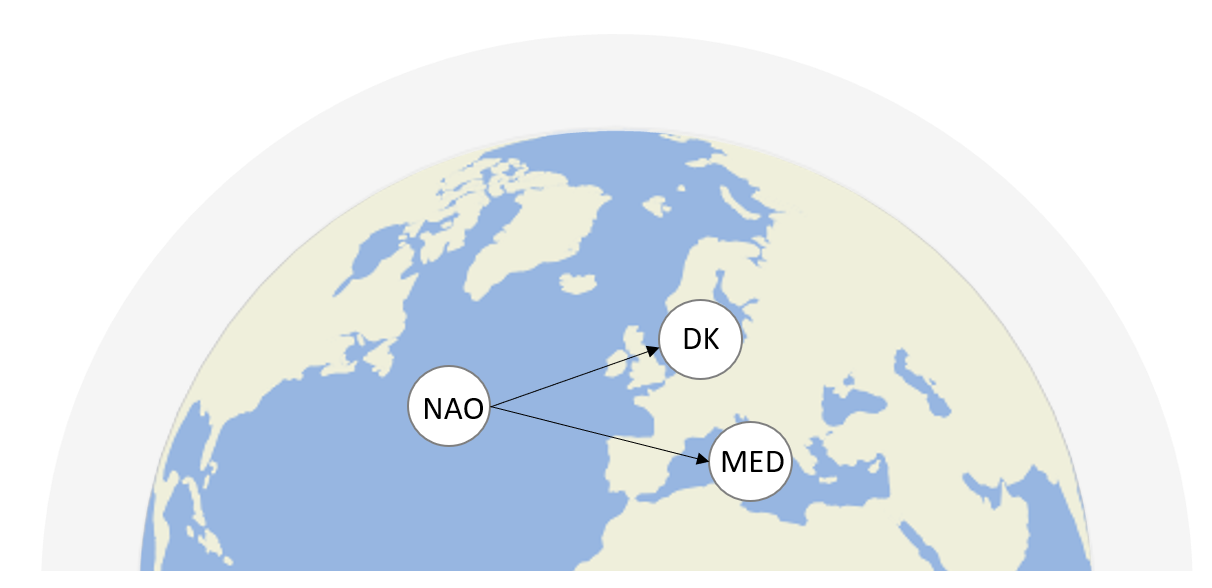

In [ ]:
# IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#
#<img src="../images/ex1.png" width="500" height="600">

### References / Notes

1. Mediterranean region as described in http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.368.3679&rep=rep1&type=pdf


## Imports

In [1]:
### IF YOU ARE RUNNING THIS WITH GOOGLE COLAB
# 1. download the files in sample_data_csv/ to your Desktop
# 2. run this line of code: it will ask you to upload the data
# 3. select ALL the files needed for this code by holding control (see below)
# precip_jja_med.csv
# precip_jja_dk.csv
# nao_jja.csv
 
from google.colab import files
uploaded = files.upload()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import statsmodels.api as sm
from scipy import signal
from scipy import stats
import pandas as pd

In [3]:
data_path = "../sample_data_csv/"

### Step 1) Load the data 

### Time series for June-July-August (jja) mean precipitation rate in the Mediterranean (MED) and over Denmark (DK), and the NAO index

In [4]:
# IF YOU ARE RUNNING THIS CODE WITH GOOGLE COLAB
med_ts = pd.read_csv('precip_jja_med.csv')
dk_ts = pd.read_csv('precip_jja_dk.csv')
nao_ts = pd.read_csv('nao_jja.csv')

In [5]:
# print the med_ts file to check loading worked well
med_ts 

,year_of_jja,med_precip_jja
0,1950,0.000004
1,1951,0.000005
2,1952,0.000004
3,1953,0.000008
4,1954,0.000003
...,...,...
65,2015,0.000013
66,2016,0.000007
67,2017,0.000006
68,2018,0.000022


In [13]:
## IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK, uncomment below
med_ts = pd.read_csv(data_path+'precip_jja_med.csv')
dk_ts = pd.read_csv(data_path+'precip_jja_dk.csv')
nao_ts = pd.read_csv(data_path+'nao_jja.csv')

In [14]:
med_ts

,year_of_jja,med_precip_jja
0,1950,0.000004
1,1951,0.000005
2,1952,0.000004
3,1953,0.000008
4,1954,0.000003
...,...,...
65,2015,0.000013
66,2016,0.000007
67,2017,0.000006
68,2018,0.000022


### Step 2)  Plotting + Data Processing

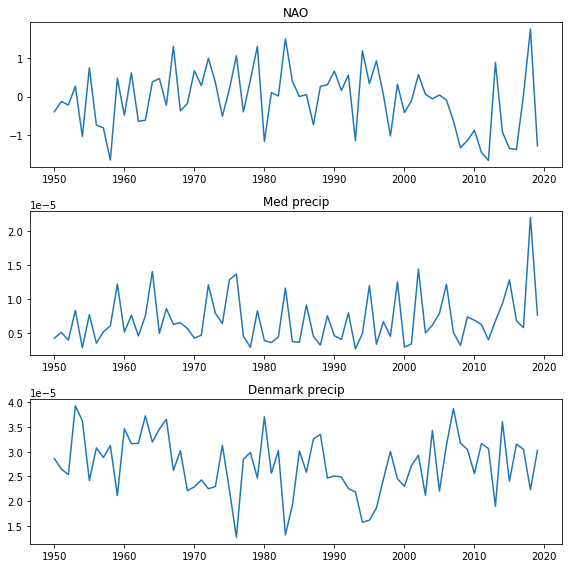

In [15]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(311)
plt.plot(nao_ts['year_of_jja'],nao_ts['nao_jja'])
plt.title('NAO')

plt.subplot(312)
plt.plot(med_ts['year_of_jja'],med_ts['med_precip_jja'])
plt.title('Med precip')

plt.subplot(313)
plt.plot(dk_ts['year_of_jja'],dk_ts['dk_precip_jja'])
plt.title('Denmark precip')
plt.tight_layout()

#### Standardize the data (zero mean, unit variance)

In [16]:
years = nao_ts['year_of_jja'] 
nao_data = nao_ts['nao_jja'] 
med_data = med_ts['med_precip_jja']
dk_data  = dk_ts['dk_precip_jja']


NAO = (nao_data - np.mean(nao_data ))/np.std(nao_data )
MED = (med_data  - np.mean(med_data ))/np.std(med_data )
DK = (dk_data  - np.mean(dk_data ))/np.std(dk_data )

#### Detrend the data (remove linear trend)

In [17]:
NAO = signal.detrend(NAO)
MED = signal.detrend(MED)
DK = signal.detrend(DK)

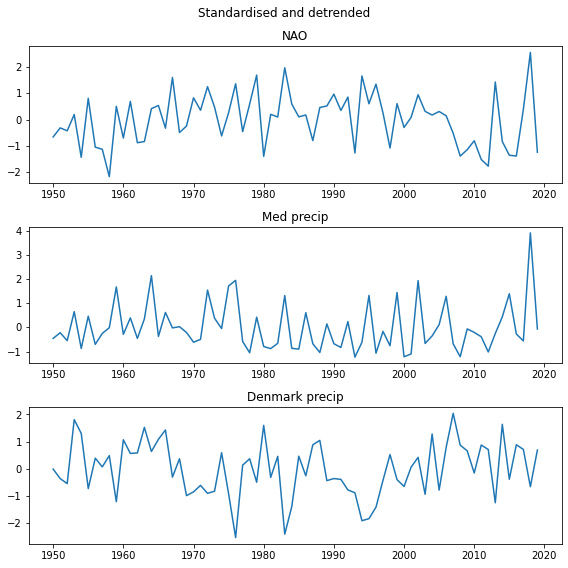

In [18]:
fig = plt.figure(figsize=(8, 8))
plt.suptitle("Standardised and detrended")

plt.subplot(311)
plt.plot(years,NAO)
plt.title('NAO')

plt.subplot(312)
plt.plot(years,MED)
plt.title('Med precip')

plt.subplot(313)
plt.plot(years,DK)
plt.title('Denmark precip')
plt.tight_layout()

### Step 3) Data analysis

In [19]:
#==========================================================
# Calculate the Pearson Correlation of MED and DK
#==========================================================

X = DK
Y = MED

r_dk_med, p_dk_med = stats.pearsonr(X, Y)

print(" The correlation of DK and MED is ", round(r_dk_med,2))
print(" p-value is ", round(p_dk_med, 2))

 The correlation of DK and MED is  -0.24
 p-value is  0.04


In [20]:
#==================================================================================
# If you "condition out" the effect of NAO..are MED and DK still correlated?

# here this is done by calculating the partial correlation of DK and MED 
# conditional on NAO.#
#==================================================================================

# 1) regress MED on NAO
X = NAO
Y = MED

model = sm.OLS(Y,X)
results = model.fit()
res_med = results.resid

del(X,Y,results,model)

# 2) regress DK on NAO
X = NAO
Y = DK

model = sm.OLS(Y,X)
results = model.fit()
res_dk = results.resid

del(X,Y,results,model)

# 3) correlate the residuals (= partial correlation)
par_corr, p = stats.pearsonr(res_dk, res_med)

print(" The partial correlation of DK and MED (cond on NAO) is ", round(par_corr, 2), "with p-value=", round(p, 2))
print("\n Compared to the full correlation (",round(r_dk_med, 2),") the partial correlation (", round(par_corr, 2),")is much smaller and not significant!")

 The partial correlation of DK and MED (cond on NAO) is  0.01 with p-value= 0.97

 Compared to the full correlation ( -0.24 ) the partial correlation ( 0.01 )is much smaller and not significant!


### Conclusions

There is a spurious correlation of MED and DK due to the influence of the common driver NAO. 
If one controls for NAO the correlation is shown to be negligible.


## EXCERCISE (solutions at the end of the notebook)

In [21]:
#============================================================================
# A. Determine the linear causal effect from NAO --> MED and print the result 
#============================================================================


Y = MED
X = NAO

model = sm.OLS(Y,X)
results = model.fit()
b = results.params[0]

del(model,results,X,Y)

print('Effect NAO --> MED =',b)


Effect NAO --> MED = 0.4191108287327272


In [22]:
#============================================================================
# B. Determine the linear causal effect from NAO --> DK and print the result 
#============================================================================

Y = DK
X = NAO

model = sm.OLS(Y,X)
results = model.fit()
a = results.params[0]

del(model,results,X,Y)

print('Effect NAO --> DK =',a)





Effect NAO --> DK = -0.5845912889104401


In [ ]:
#==================================================================================
# C. Apply the path tracing rule:
# Can you compute the expected correlation between MED and DK using the results from
# exercises A and B? How does this compare with the actual correlation r_dk_med?
#==================================================================================





SOLUTIONS

In [ ]:
#============================================================================
# A. Determine the linear causal effect from NAO --> MED and print the result 
#============================================================================

Y = MED
X = NAO

model = sm.OLS(Y,X)
results = model.fit()
ce_nao_med = results.params[0]

del(model,results,X,Y)

print("The causal effect of NAO on MED  is ", round(ce_nao_med,2))

The causal effect of NAO on MED  is  0.42


In [ ]:
#============================================================================
# B. Determine the linear causal effect from NAO --> DK and print the result 
#============================================================================

Y = DK
X =  NAO

model = sm.OLS(Y,X)
results = model.fit()

ce_nao_dk = results.params[0]

print("The effect of NAO on DK  is ", round(ce_nao_dk,2))

The effect of NAO on DK  is  -0.58


In [ ]:
#==================================================================================
# C. Apply the path tracing rule:
# Can you compute the expected correlation between MED and DK using the results from
# exercises A and B? How does this compare with the actual correlation r_dk_med?
#==================================================================================

exp_corr_dk_med = ce_nao_med * ce_nao_dk

print("The expected correlation of MED and DK  is ", round(exp_corr_dk_med,2))
print("The actual correlation of MED and DK  is ", round(r_dk_med, 2))
print("The path tracing rule works well, hence the linear approximation is a good one in this case.")

The expected correlation of MED and DK  is  -0.25
The actual correlation of MED and DK  is  -0.24
The path tracing rule works well, hence the linear approximation is a good one in this case.
